## Lab 1: EDA
### Darian Yang

We provided you with an obfuscated scientific dataset. Each row is an observation. 

**The first column, titled “experimental_proprty” is your target property of interest**. 

All other columns encode features. There are no observation IDs.

You will have to perform EDA analysis:
-	Load data, prepare for analysis, process if necessary
-	Analyze types of data
-	Find and process missing and erroneous features
-	Find outliers (if any)
-	Find highly correlated variables (if any).
-	Find if the target variable is correlated with any features.
-	Use PCA to plot data in 2D and color code by the target property. Do you see any patterns?
-	Prepare a short write-up describing your processing technics and choices above.

Bonus Qs:
-	Use any non-linear dimensionality reduction method. Plot data in 2D and color code by the target property. Compare observed picture with PCA.
-	Surprise me! Uncover hidden patterns and find non-trivial relationships in the data


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### First load the data and analyze data types present

In [3]:
# load data
df = pd.read_csv("lab1_dataset.csv")

In [4]:
# analyze data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 552 entries, experimental_proprty to n6Ring
dtypes: float64(444), int64(105), object(3)
memory usage: 8.4+ MB
None


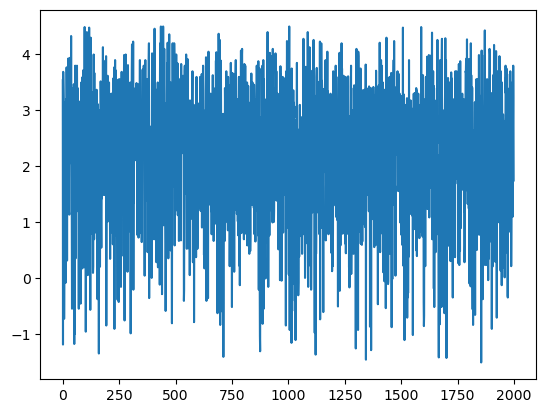

In [5]:
# target property
plt.plot(df["experimental_proprty"])

In [87]:
target_unq = np.unique(df.iloc[:,0].values)
target_unq

array([-1.5 , -1.45, -1.42, -1.41, -1.4 , -1.36, -1.34, -1.3 , -1.28,
       -1.25, -1.18, -1.17, -1.15, -1.1 , -1.03, -1.01, -0.99, -0.98,
       -0.97, -0.95, -0.92, -0.9 , -0.87, -0.86, -0.85, -0.84, -0.83,
       -0.82, -0.81, -0.8 , -0.78, -0.75, -0.73, -0.72, -0.7 , -0.66,
       -0.65, -0.62, -0.6 , -0.59, -0.58, -0.56, -0.55, -0.54, -0.53,
       -0.51, -0.5 , -0.46, -0.45, -0.42, -0.41, -0.4 , -0.38, -0.37,
       -0.35, -0.34, -0.33, -0.31, -0.3 , -0.28, -0.26, -0.22, -0.21,
       -0.2 , -0.18, -0.16, -0.15, -0.14, -0.12, -0.11, -0.1 , -0.09,
       -0.08, -0.07, -0.05, -0.04, -0.03, -0.01,  0.  ,  0.01,  0.02,
        0.05,  0.06,  0.07,  0.08,  0.1 ,  0.11,  0.12,  0.13,  0.14,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.27,  0.29,
        0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,  0.37,  0.38,
        0.39,  0.4 ,  0.42,  0.44,  0.45,  0.46,  0.47,  0.49,  0.5 ,
        0.51,  0.52,  0.53,  0.54,  0.55,  0.56,  0.58,  0.59,  0.6 ,
        0.61,  0.62,

The target property seems to be a continuous dataset from -1.5 to 4.5.

### Need to fix missing and erroneous features

In [6]:
# detect columns with nan vals or that are objects
for col in df.columns:
    # note MW2 was fixed with no NaNs
    if df[col].isnull().values.any():
        print(f"HAS NaN: {col}")
    if df[col].dtype == object:
        print(f"COL: {col} is of type object")

COL: MS_enc is of type object
HAS NaN: MW2
COL: MIF is of type object
COL: SMIF is of type object


#### So because MS_enc, MIF and SMIF are objects, need to examine them further

0       PPENPINEAPLE42
1       PPENPINEAPLE42
2       PPENPINEAPLE42
3       HTXPTDWTTWOBJR
4       PPENPINEAPLE42
             ...      
1995    PPENPINEAPLE42
1996    PPENPINEAPLE42
1997    VMZXVMIGMRZLPU
1998    HTXPTDWTTWOBJR
1999    PPENPINEAPLE42
Name: MS_enc, Length: 2000, dtype: object


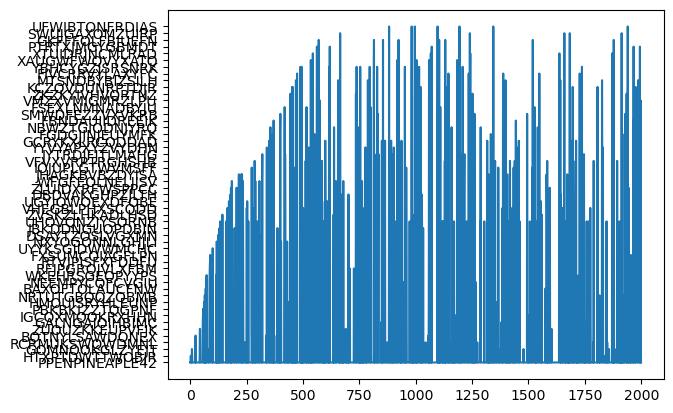

In [7]:
plt.plot(df["MS_enc"])
print(df["MS_enc"])

In [8]:
# remove this column
df = df.drop("MS_enc", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 551 entries, experimental_proprty to n6Ring
dtypes: float64(444), int64(105), object(2)
memory usage: 8.4+ MB


So MS_enc data is not relavant/analyzable.

0       Computation failed
1                       59
2                       37
3                       46
4                       55
               ...        
1995                    68
1996                    45
1997                    56
1998                    42
1999                    50
Name: MIF, Length: 2000, dtype: object


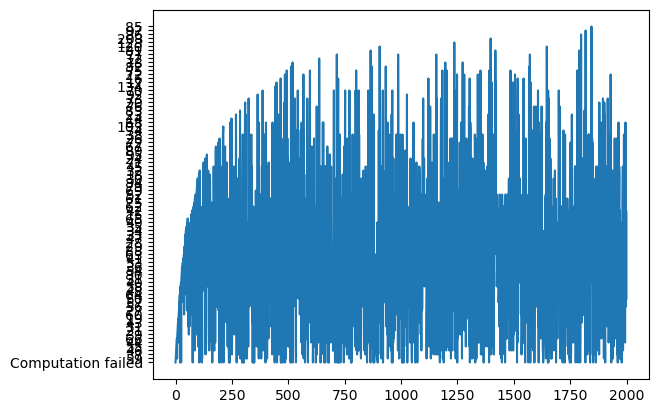

In [9]:
plt.plot(df["MIF"])
print(df["MIF"])

The MIF data just needs to be fixed by removing computation failed, for now I will replace with zero.

In [10]:
df["MIF"] = df["MIF"].replace(["Computation failed"], 0)
# now that the string is gone, can change to ints
df["MIF"] = pd.to_numeric(df["MIF"])
# only 1 object column now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 551 entries, experimental_proprty to n6Ring
dtypes: float64(444), int64(106), object(1)
memory usage: 8.4+ MB


0            bigger
1       the_biggest
2               big
3            bigger
4            bigger
           ...     
1995    the_biggest
1996         bigger
1997         bigger
1998         bigger
1999         bigger
Name: SMIF, Length: 2000, dtype: object


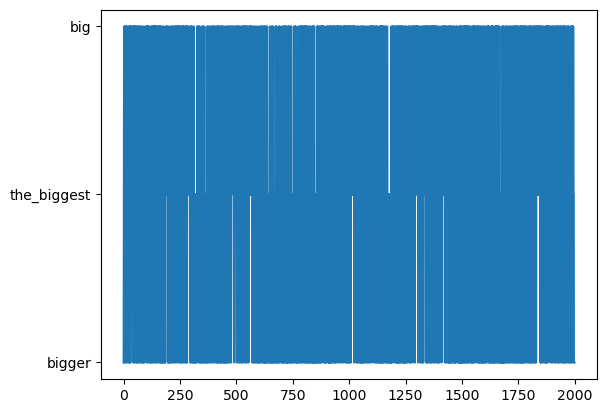

In [11]:
plt.plot(df["SMIF"])
print(df["SMIF"])

I should probably convert this to numerical values since there is an order to this categorical data (ordinal).

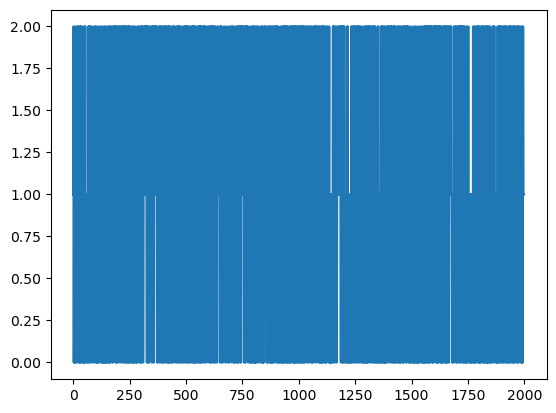

In [12]:
# make dict for the conversion
smif_key = {"big" : 0, "bigger" : 1, "the_biggest" : 2}
df = df.replace({"SMIF" : smif_key})
plt.plot(df["SMIF"])

In [13]:
# make smif numerical
df["SMIF"] = pd.to_numeric(df["SMIF"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 551 entries, experimental_proprty to n6Ring
dtypes: float64(444), int64(107)
memory usage: 8.4 MB


### Now time to fix the NaN value

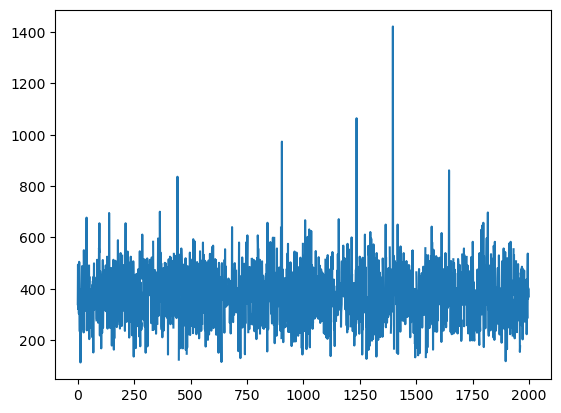

In [14]:
# plot MW2 to see what it looks like
plt.plot(df["MW2"])

From this plot, it is probably wiser to replace the NaN with the average rather than a zero.

In [15]:
# replace NaN values in MW2 with average value
df["MW2"].fillna(value=df["MW2"].mean(), inplace=True)

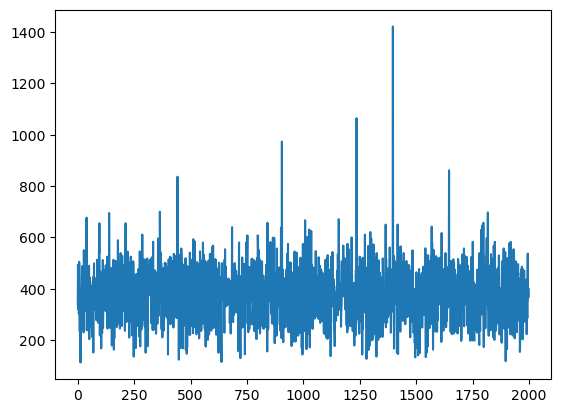

In [16]:
plt.plot(df["MW2"])

It doesn't look any different, but it will be better for analysis now.

### Now time to find any outliers

In [17]:
# lets make a function for this
def outlier_detector(data, nstd=25):
    """
    Take a 1d array/series, see if there are any outliers based
    on the avg and +/- n times the stdev.

    Parameters
    ----------
    data : 1d array
    nstd : int
        Number of stdevs to use for detection.

    Returns
    -------
    outliers : bool
        T/F depending on presence of outlier (T) or not (F).
    """
    avg = np.average(data)
    std = np.std(data)
    outliers = False
    for i in data:
        if i > avg + (std * nstd) or i < avg - (std * nstd):
            outliers = True
    return outliers

In [18]:
outliers = [col for col in df.columns if outlier_detector(df[col])]
#print(outliers)
print(f"There are {len(outliers)} outliers (at least based on my arbitrary cutoff)")

There are 12 outliers (at least based on my arbitrary cutoff)


Lets take a further look at the features with outliers

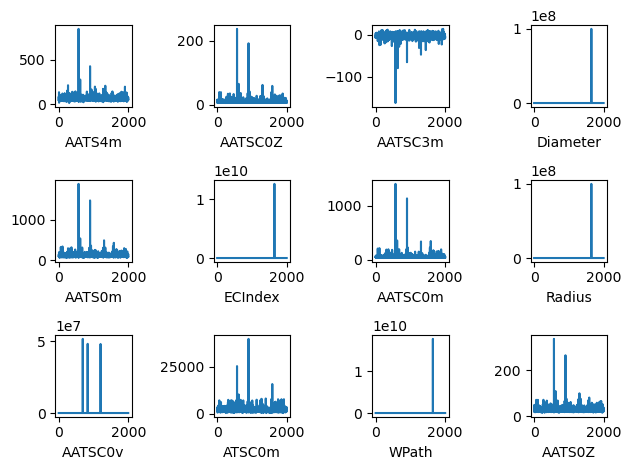

In [19]:
fig, axes = plt.subplots(3,4)
for i, ax in enumerate(fig.axes):
    ax.plot(df[outliers[i]])
    ax.set_xlabel(outliers[i])
fig.tight_layout()

TODO: Get rid of outliers

### Time to find correlated varibles (if any)
I will do this by generating a heatmap of the correlation coefficient matrix for each feature

In [20]:
def calc_r2(x, y):
    """
    Using linear regression, find and return the R^2 value for the
    given x and y 1d datasets.

    Parameters
    ----------
    x : 1d array
    y : 1d array

    Returns
    -------
    r2 : float
        The correlation coefficient squared.
    """
    corr_matrix = np.corrcoef(x, y)
    #print(corr_matrix)
    corr = corr_matrix[0, 1]
    r2 = corr ** 2
    return r2

In [21]:
# refresher on col names
df.columns

Index(['experimental_proprty', 'nHetero', 'nX', 'C2SP3', 'MPC5', 'ATS0i',
       'NaasN', 'SsCH3', 'nCl', 'nFAHRing',
       ...
       'AATS0Z', 'ATSC0are', 'ATSC2pe', 'SsCl', 'ATS6v', 'AATSC1dv', 'nFARing',
       'AATS2v', 'Xp-7dv', 'n6Ring'],
      dtype='object', length=551)

0.9999999999999998

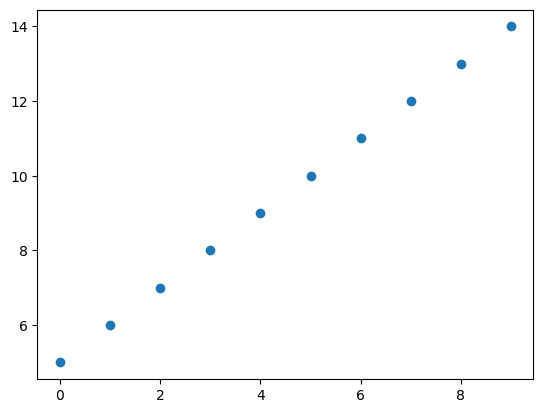

In [22]:
# testing on random data
x = df["SsCH3"]
y = df["nCl"]
x = np.arange(10)
y = np.arange(10) + 5
#y = np.random.rand(10)
plt.scatter(x, y)
calc_r2(x, y)


In [23]:
# build a matrix of R^2 values for each feature of the df
r2_matrix = np.zeros(shape=(len(df.columns), len(df.columns)))
#r2_matrix.shape
for i, col1 in enumerate(df.columns):
    for j, col2 in enumerate(df.columns):
        r2 = calc_r2(df[col1], df[col2])
        r2_matrix[i, j] = r2

r2_matrix

/Users/darian/anaconda3/envs/ml/lib/python3.8/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/darian/anaconda3/envs/ml/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


array([[1.00000000e+00, 1.08436537e-06, 1.09851276e-02, ...,
        8.46887334e-03, 1.46588065e-02, 4.83659726e-02],
       [1.08436537e-06, 1.00000000e+00, 2.20620649e-01, ...,
        1.50305129e-02, 1.35233578e-01, 3.71354452e-02],
       [1.09851276e-02, 2.20620649e-01, 1.00000000e+00, ...,
        1.95739566e-02, 7.02061115e-03, 1.45316097e-03],
       ...,
       [8.46887334e-03, 1.50305129e-02, 1.95739566e-02, ...,
        1.00000000e+00, 4.73787319e-02, 1.68675390e-03],
       [1.46588065e-02, 1.35233578e-01, 7.02061115e-03, ...,
        4.73787319e-02, 1.00000000e+00, 2.62008818e-01],
       [4.83659726e-02, 3.71354452e-02, 1.45316097e-03, ...,
        1.68675390e-03, 2.62008818e-01, 1.00000000e+00]])

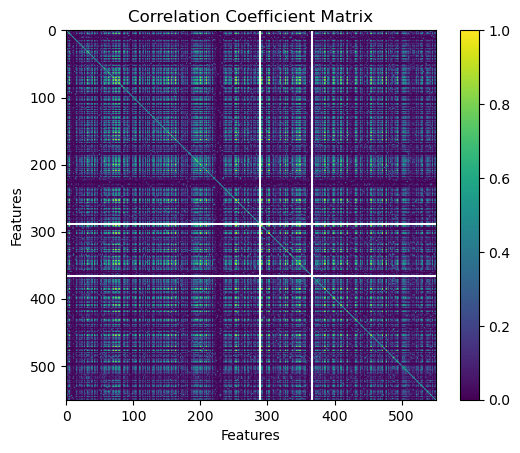

In [24]:
fig, ax = plt.subplots()
plot = ax.imshow(r2_matrix)
ax.set_title("Correlation Coefficient Matrix")
ax.set_xlabel("Features")
ax.set_ylabel("Features")
fig.colorbar(plot)

Okay, so it's not super interpretable... but it does make it easier to now zoom in on the more correlated features.

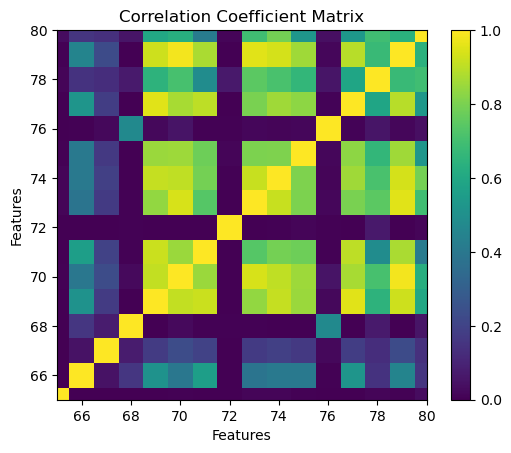

In [25]:
ax.set_xlim(65,80)
ax.set_ylim(65,80)
fig

So for example, it seems like one of the highly correlated variables is columns 79 and 70, let's test this to make sure.

ATS1se ATS0are


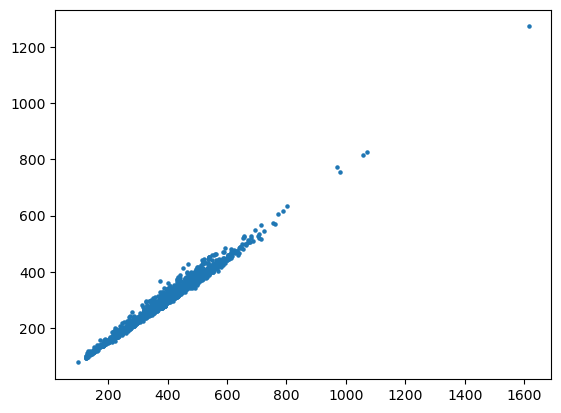

In [26]:
plt.scatter(df.iloc[:,79], df.iloc[:,70], s=5)
print(df.columns[79], df.columns[70])

Looks like it works!

### Now it's time to find the correlated features in regards to our target property

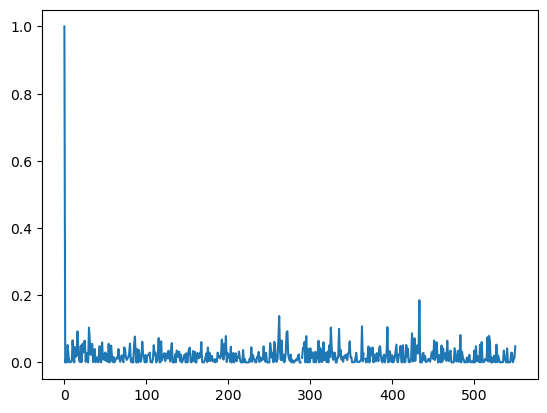

In [27]:
# I can just pull the first row or column of the r2_matrix (target is first col)
target_r2 = r2_matrix[:,0]
fig, ax = plt.subplots()
ax.plot(target_r2)

While none of the features are highly correlated to the target property, let's take a closer look at the most correlated feature to the target property.

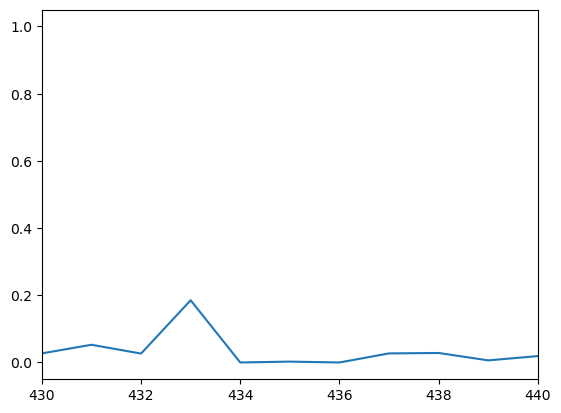

In [28]:
ax.set_xlim(430,440)
fig


0.1851776021173833
SLogP


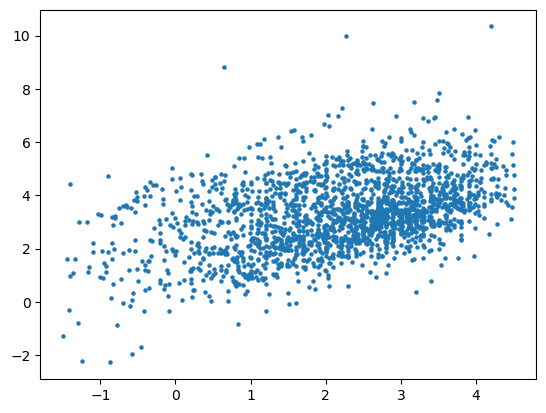

In [29]:
plt.scatter(df.iloc[:,0], df.iloc[:,433], s=5)
print(target_r2[433])
print(df.columns[433])


So the SLogP is the most correlated feature for experimental property.

### Now it's time to plot PC1 and PC2 of entire df with the cbar as the experimental property value

First we need to standardize our dataset, again I will create a function for this.

In [47]:
def standardize(data, std=True):  
    """
    Standardize the input data array. For each column, 
    substract the mean value, then divide by the standard deviation.
    
    Parameters
    ----------
    data : dataframe
    std : bool
        Whether or not to just subtract average (centering data) or 
        to also divide by the stdev (normalizing (variance = 1)).
    
    Returns
    -------
    std_array : array
        Standardized array.
    """    
    n_rows, n_cols = data.shape
    std_array = np.zeros(shape=(n_rows, n_cols))
    tmp_array = np.zeros(n_rows)
    
    for col in range(n_cols):
        avg = np.average(data[:,col])
        std = np.std(data[:,col])
        
        for idx, element in enumerate(data[:,col]):
            if std:
                tmp_array[idx] = (element - avg) / std
            else:
                tmp_array[idx] = element - avg
 
        std_array[:,col] = tmp_array
    
    return std_array

In [31]:
# df.values returns np rep of the df
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.values.html
std_df = standardize(df.values)

/var/folders/_t/r9yjtg1s6sz0xnc2qjthc7d40000gn/T/ipykernel_76315/1770618499.py:24: RuntimeWarning: invalid value encountered in double_scalars
  tmp_array[idx] = (element - avg) / std


Now it's time to get the covariance matrix by multiplying the matrix of features by its transpose. Then I can run eigendecomp to get the eigenvectors (PCs) and eigenvalues (percent of variance represented by each eigenvector (out of the total variance = trace of covar)).

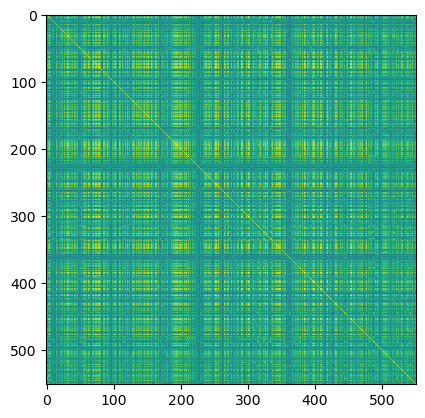

In [66]:
covar = np.cov(std_df.T)

# there are nans here for some reason, setting to zero
covar[np.isnan(covar)] = 0

plt.imshow(covar)

In [33]:
eval, evec = np.linalg.eig(covar)

In [63]:
evec.shape
evec[0]

array([-1.27981886e-02+0.00000000e+00j,  1.28789021e-02+0.00000000e+00j,
       -5.03887966e-02+0.00000000e+00j, -1.41271604e-02+0.00000000e+00j,
       -1.44873385e-02+0.00000000e+00j,  4.14867445e-03+0.00000000e+00j,
       -2.07196582e-02+0.00000000e+00j,  2.99112064e-02+0.00000000e+00j,
       -1.01188215e-02+0.00000000e+00j,  1.36544573e-02+0.00000000e+00j,
        9.55825004e-02+0.00000000e+00j, -4.68034835e-02+0.00000000e+00j,
       -1.43151523e-03+0.00000000e+00j, -3.16312328e-02+0.00000000e+00j,
       -3.62606577e-02+0.00000000e+00j,  5.35635397e-02+0.00000000e+00j,
       -7.67628321e-03+0.00000000e+00j, -9.32101081e-03+0.00000000e+00j,
        3.18051477e-03+0.00000000e+00j, -1.78984033e-02+0.00000000e+00j,
        4.09052574e-02+0.00000000e+00j,  8.19818884e-02+0.00000000e+00j,
       -9.80494046e-02+0.00000000e+00j,  4.53817079e-02+0.00000000e+00j,
        6.26060472e-02+0.00000000e+00j, -8.25781120e-02+0.00000000e+00j,
       -1.98322272e-02+0.00000000e+00j, -2.79306645

In [35]:
len(evec[0]) == len(df.columns)

True

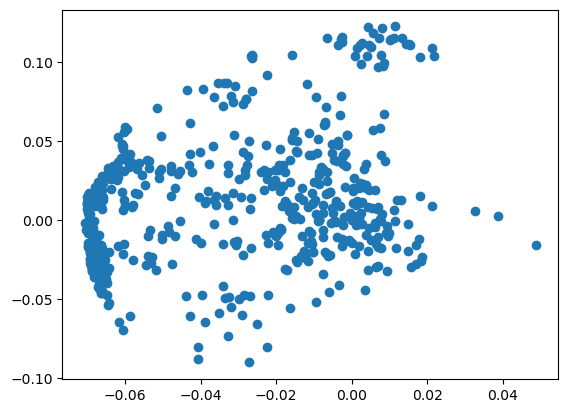

In [76]:
plt.scatter(evec[:,0], evec[:,1])

Actually, after the lecture on PCA, I think it may be easier to do this in sklearn instead of numpy.

In [38]:
from sklearn import manifold
from sklearn.decomposition import PCA

I'm curious because in class we mentioned that the data had only needed to be centered (subtracting the mean), so I will run PCA on the centered as well as my fully standardized df (where you subtract mean and divide by std).

Text(0, 0.5, 'cumulative explained variance')

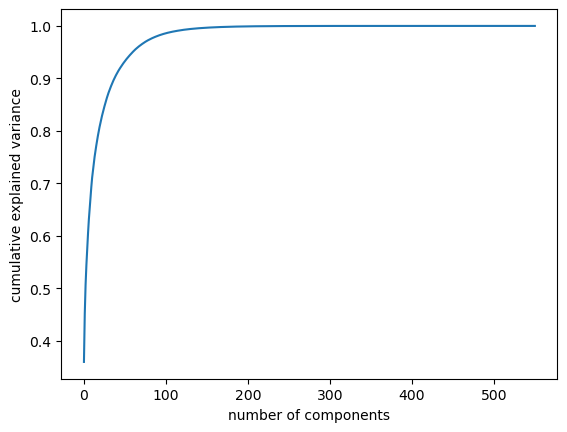

In [77]:
# only center, don't standardize
cent_df = standardize(df.values, std=False)
pca = PCA().fit(cent_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [73]:
print(pca.components_.shape)
print(pca.components_[0])

(551, 2000)
[ 0.00242186 -0.02098451  0.01405228 ... -0.00872253  0.01203888
 -0.00062054]


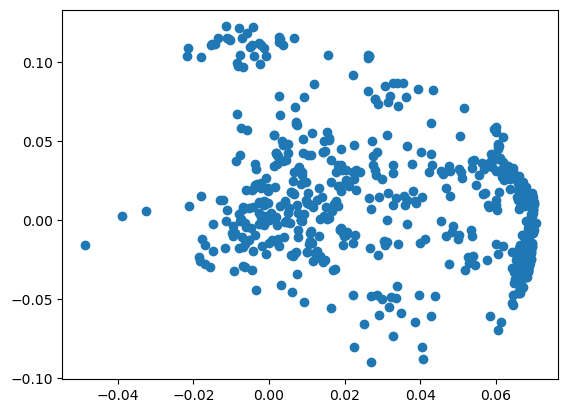

In [78]:
plt.scatter(pca.components_[0], pca.components_[1])

(551, 551)

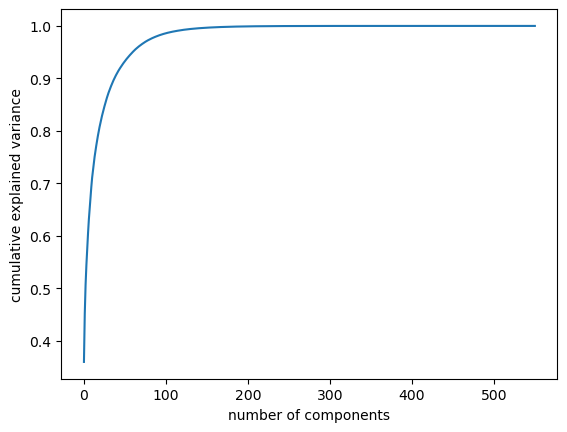

In [52]:
# here using standardized df
std_df[np.isnan(std_df)] = 0
pca_std = PCA().fit(std_df)
plt.plot(np.cumsum(pca_std.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
pca_std.components_.shape

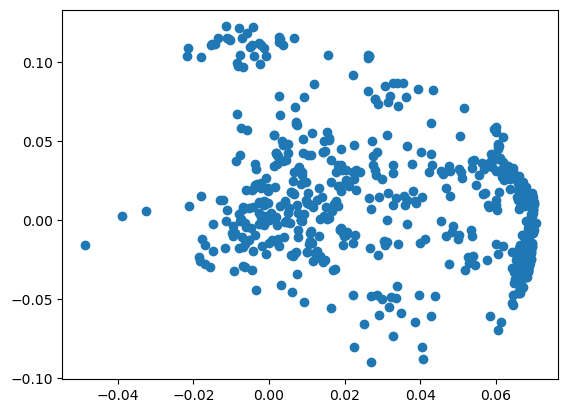

In [59]:
plt.scatter(pca_std.components_[0], pca_std.components_[1])

In [64]:
pca.components_ == pca_std.components_

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

So it turns out that it doesn't matter if you just center or if you fully standardize, the PCA is the same. Overall only the centering of the data matters for PCA it seems. It also seems like my numpy PCA implementation worked, but it is reversed, maybe because of the complex number output from numpy, which could be handled differently in the sklean backend.

Text(0, 0.5, 'explained variance')

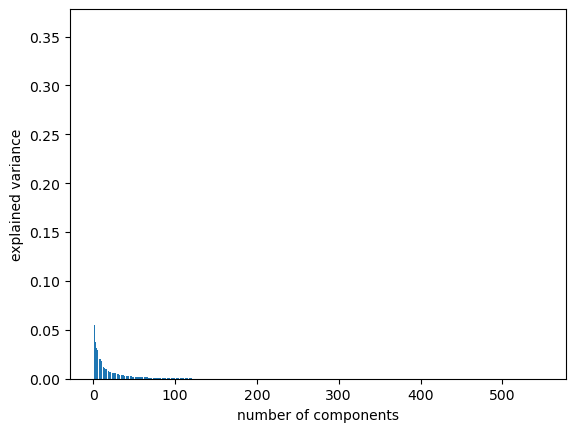

In [81]:
plt.bar(range(0, len(pca_std.explained_variance_ratio_)), pca_std.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')

Up to this point, I was testing out sklearn vs numpy. Now getting my actual PCA dataset, here only the first 2 PCs and using the transposed df since I want to color code by target property.

In [82]:
pca_2c = PCA(n_components=2).fit(std_df.T)
pca_2c.components_.shape

(2, 2000)

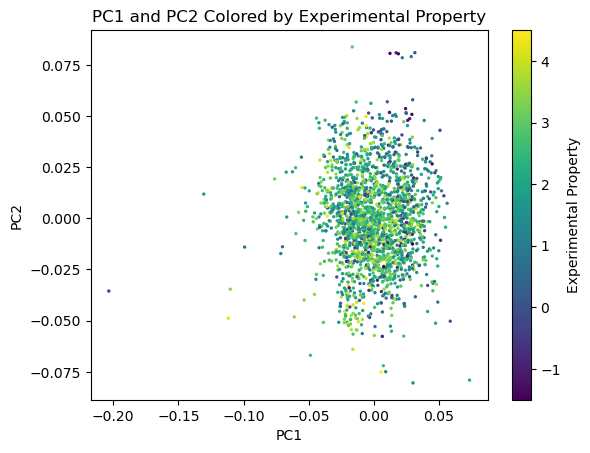

In [94]:
plt.scatter(pca_2c.components_[0], pca_2c.components_[1], c=df.iloc[:,0], s=2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PC1 and PC2 Colored by Experimental Property")
cbar = plt.colorbar()
cbar.set_label("Experimental Property")

Overall, I do not see any patterns in the PC1 and PC2 data based on the target property.

TODO: prepare outline, maybe run tSNE to further seperate PCA data